# Import

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')
filepath="/content/drive/MyDrive/Colab Notebooks"

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import numpy as np
import random
import os

# C·ªë ƒë·ªãnh seed cho Python, NumPy, TensorFlow
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# C·ªë ƒë·ªãnh ch·∫ø ƒë·ªô ch·∫°y ƒë∆°n lu·ªìng (tr√°nh nhi·ªÖu t·ª´ CPU)
os.environ['PYTHONHASHSEED'] = str(SEED)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# ƒê·ªçc file

In [ ]:
df1 = pd.read_csv(f"{filepath}/Stock_VCB_filled.csv")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371 entries, 0 to 1370
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1371 non-null   object 
 1   code          1371 non-null   object 
 2   high          1371 non-null   float64
 3   low           1371 non-null   float64
 4   open          1371 non-null   float64
 5   close         1371 non-null   float64
 6   volume_match  1371 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 75.1+ KB


In [ ]:
# Convert 'date' column to pandas datetime format
df1['date'] = pd.to_datetime(df1['date'])  # Convert to datetime
df1.set_index('date', inplace=True)  # Set as index, so that pandas can handle timeseries
df1 = df1.sort_index()  # Ensure it's sorted

In [ ]:
df1

code  high   low  open  close  volume_match
date                                                  
2019-10-01  VCB  83.6  81.8  82.1   83.4        795100
2019-10-02  VCB  83.7  81.7  83.4   82.0       1224650
2019-10-03  VCB  82.0  80.6  81.8   82.0       1003810
2019-10-04  VCB  83.5  81.8  82.0   83.0       1121700
2019-10-07  VCB  84.5  82.8  82.0   82.8       1134390
...         ...   ...   ...   ...    ...           ...
2024-12-25  VCB  93.8  92.2  92.2   92.4       1827700
2024-12-26  VCB  92.8  92.0  92.5   92.1       2202900
2024-12-27  VCB  93.0  92.2  92.5   92.2       1639900
2024-12-30  VCB  92.5  92.0  92.2   92.0       1706700
2024-12-31  VCB  92.4  91.2  92.2   91.2       2374000

[1371 rows x 6 columns]

In [ ]:
df2 = pd.read_csv(f"{filepath}/Stock_VNindex_filled.csv")
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371 entries, 0 to 1370
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1371 non-null   object 
 1   code          1371 non-null   object 
 2   high          1371 non-null   float64
 3   low           1371 non-null   float64
 4   open          1371 non-null   float64
 5   close         1371 non-null   float64
 6   adjust        1371 non-null   float64
 7   volume_match  1371 non-null   float64
 8   value_match   1371 non-null   float64
dtypes: float64(7), object(2)
memory usage: 96.5+ KB


In [ ]:
# Convert 'date' column to pandas datetime format
df2['date'] = pd.to_datetime(df2['date'])  # Convert to datetime
df2.set_index('date', inplace=True)  # Set as index, so that pandas can handle timeseries
df2 = df2.sort_index()  # Ensure it's sorted

In [ ]:
df2

code     high      low     open    close   adjust  \
date                                                               
2019-10-01  VNINDEX   999.72   996.20   997.87   999.59   999.59   
2019-10-02  VNINDEX  1000.93   989.63   999.18   991.19   991.19   
2019-10-03  VNINDEX   992.45   983.35   985.65   992.45   992.45   
2019-10-04  VNINDEX   994.81   987.59   993.69   987.59   987.59   
2019-10-07  VNINDEX   990.34   983.09   989.45   983.09   983.09   
...             ...      ...      ...      ...      ...      ...   
2024-12-25  VNINDEX  1283.09  1261.87  1262.03  1274.04  1274.04   
2024-12-26  VNINDEX  1277.17  1271.99  1275.68  1272.87  1272.87   
2024-12-27  VNINDEX  1277.89  1272.23  1275.56  1275.14  1275.14   
2024-12-30  VNINDEX  1274.15  1268.77  1273.75  1272.02  1272.02   
2024-12-31  VNINDEX  1272.46  1266.78  1272.25  1266.78  1266.78   

            volume_match   value_match  
date                                    
2019-10-01   138885870.0  3.113323e+12  
2019-10-02   152337130.0  3.552889e+12  
2019-10-03   153492420.0  3.243848e+12  
2019-10-04   150673460.0  3.264212e+12  
2019-10-07   147636100.0  3.089197e+12  
...                  ...           ...  
2024-12-25   724345690.0  1.651200e+13  
2024-12-26   502071890.0  1.064038e+13  
2024-12-27   579882989.0  1.328606e+13  
2024-12-30   452946957.0  1.001233e+13  
2024-12-31   407171783.0  9.570643e+12  

[1371 rows x 8 columns]

In [ ]:
# T√≠nh EMA 12 ng√†y v√† EMA 26 ng√†y
df2['ema_12'] = df2['close'].ewm(span=12, adjust=False).mean()
df2['ema_26'] = df2['close'].ewm(span=26, adjust=False).mean()

# T√≠nh MACD
df2['macd'] = df2['ema_12'] - df2['ema_26']

# T√≠nh Signal Line (EMA 9 ng√†y c·ªßa MACD)
df2['macd_signal'] = df2['macd'].ewm(span=9, adjust=False).mean()

# Hi·ªÉn th·ªã k·∫øt qu·∫£
print(df2[['close', 'macd', 'macd_signal']].head())

             close      macd  macd_signal
date                                     
2019-10-01  999.59  0.000000     0.000000
2019-10-02  991.19 -0.670085    -0.134017
2019-10-03  992.45 -1.086932    -0.324600
2019-10-04  987.59 -1.788827    -0.617445
2019-10-07  983.09 -2.677333    -1.029423


In [ ]:
df2

code     high      low     open    close   adjust  \
date                                                               
2019-10-01  VNINDEX   999.72   996.20   997.87   999.59   999.59   
2019-10-02  VNINDEX  1000.93   989.63   999.18   991.19   991.19   
2019-10-03  VNINDEX   992.45   983.35   985.65   992.45   992.45   
2019-10-04  VNINDEX   994.81   987.59   993.69   987.59   987.59   
2019-10-07  VNINDEX   990.34   983.09   989.45   983.09   983.09   
...             ...      ...      ...      ...      ...      ...   
2024-12-25  VNINDEX  1283.09  1261.87  1262.03  1274.04  1274.04   
2024-12-26  VNINDEX  1277.17  1271.99  1275.68  1272.87  1272.87   
2024-12-27  VNINDEX  1277.89  1272.23  1275.56  1275.14  1275.14   
2024-12-30  VNINDEX  1274.15  1268.77  1273.75  1272.02  1272.02   
2024-12-31  VNINDEX  1272.46  1266.78  1272.25  1266.78  1266.78   

            volume_match   value_match       ema_12       ema_26      macd  \
date                                                                         
2019-10-01   138885870.0  3.113323e+12   999.590000   999.590000  0.000000   
2019-10-02   152337130.0  3.552889e+12   998.297692   998.967778 -0.670085   
2019-10-03   153492420.0  3.243848e+12   997.398047   998.484979 -1.086932   
2019-10-04   150673460.0  3.264212e+12   995.889117   997.677944 -1.788827   
2019-10-07   147636100.0  3.089197e+12   993.920022   996.597355 -2.677333   
...                  ...           ...          ...          ...       ...   
2024-12-25   724345690.0  1.651200e+13  1262.507215  1258.347473  4.159742   
2024-12-26   502071890.0  1.064038e+13  1264.101490  1259.423215  4.678274   
2024-12-27   579882989.0  1.328606e+13  1265.799722  1260.587422  5.212300   
2024-12-30   452946957.0  1.001233e+13  1266.756688  1261.434279  5.322408   
2024-12-31   407171783.0  9.570643e+12  1266.760274  1261.830259  4.930016   

            macd_signal  
date                     
2019-10-01     0.000000  
2019-10-02    -0.134017  
2019-10-03    -0.324600  
2019-10-04    -0.617445  
2019-10-07    -1.029423  
...                 ...  
2024-12-25     3.725967  
2024-12-26     3.916428  
2024-12-27     4.175603  
2024-12-30     4.404964  
2024-12-31     4.509974  

[1371 rows x 12 columns]

In [ ]:
df3 = pd.read_csv(f"{filepath}/bullish_index_summary.csv")
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371 entries, 0 to 1370
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                1371 non-null   object 
 1   total_articles      1371 non-null   int64  
 2   bullish_index       1371 non-null   float64
 3   dominant_sentiment  1371 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 43.0+ KB


In [ ]:
# Convert 'date' column to pandas datetime format
df3['date'] = pd.to_datetime(df3['date'])  # Convert to datetime
df3.set_index('date', inplace=True)  # Set as index, so that pandas can handle timeseries
df3 = df3.sort_index()  # Ensure it's sorted

In [ ]:
df3

total_articles  bullish_index dominant_sentiment
date                                                        
2019-10-01              12       0.625000            neutral
2019-10-02              13       0.769231           positive
2019-10-03              12       0.625000           positive
2019-10-04              22       0.659091           positive
2019-10-07              17       0.441176           negative
...                    ...            ...                ...
2024-12-25              44       0.625000            neutral
2024-12-26              43       0.639535           positive
2024-12-27              56       0.580357           positive
2024-12-30              47       0.574468           positive
2024-12-31              15       0.733333           positive

[1371 rows x 3 columns]

In [ ]:
# M√£ h√≥a sentiment th√†nh c√°c gi√° tr·ªã s·ªë
df3['sentiment_encoded'] = df3['dominant_sentiment'].map({'positive': 1, 'negative': -1, 'neutral': 0})

# Ki·ªÉm tra k·∫øt qu·∫£
# Use df3.index to access the date which is now the index
print(df3[['dominant_sentiment', 'sentiment_encoded']].head())
print(df3.index[:5]) # Print the first 5 dates from the index

           dominant_sentiment  sentiment_encoded
date                                            
2019-10-01            neutral                  0
2019-10-02           positive                  1
2019-10-03           positive                  1
2019-10-04           positive                  1
2019-10-07           negative                 -1
DatetimeIndex(['2019-10-01', '2019-10-02', '2019-10-03', '2019-10-04',
               '2019-10-07'],
              dtype='datetime64[ns]', name='date', freq=None)


In [ ]:
# Merge d·ªØ li·ªáu
df = df1.merge(df2[['macd', 'macd_signal']], on='date', how='left', suffixes=('', '_vnindex'))
# df = df.merge(df3[['bullish_index', 'sentiment_encoded']], on='date', how='left')

# Lo·∫°i b·ªè c√°c h√†ng c√≥ gi√° tr·ªã NaN
df.dropna(inplace=True)

In [ ]:
df.drop(columns=['code'], inplace=True)

# X·ª≠ l√Ω

In [ ]:
# T·∫°o scaler cho to√†n b·ªô d·ªØ li·ªáu nh∆∞ng gi·ªØ scaler ri√™ng cho 'close'
scaler = MinMaxScaler()
scaler_close = MinMaxScaler()

columns_to_scale = ['high', 'low', 'open', 'volume_match', 'macd', 'macd_signal']

# Chia d·ªØ li·ªáu train/test TR∆Ø·ªöC khi scale
train_size = int(len(df) * 0.8)
df_train = df.iloc[:train_size]
df_test = df.iloc[train_size:]

# Fit tr√™n train, transform tr√™n test
df_train[columns_to_scale] = scaler.fit_transform(df_train[columns_to_scale])
df_test[columns_to_scale] = scaler.transform(df_test[columns_to_scale])

# Scale ri√™ng c·ªôt 'close'
df_train[['close']] = scaler_close.fit_transform(df_train[['close']])
df_test[['close']] = scaler_close.transform(df_test[['close']])

# Gh√©p l·∫°i th√†nh df_scaled (kh√¥ng ·∫£nh h∆∞·ªüng t·ªõi qu√° tr√¨nh train-test)
df_scaled = pd.concat([df_train, df_test])

# H√†m t·∫°o chu·ªói d·ªØ li·ªáu
def create_sequences(data, target_column, time_steps=30):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data.iloc[i:i+time_steps].values)
        y.append(data.iloc[i+time_steps][target_column])
    return np.array(X), np.array(y)

time_steps = 30
target_column = 'close'  # D·ª± ƒëo√°n gi√° ƒë√≥ng c·ª≠a VCB

X, y = create_sequences(df_scaled, target_column, time_steps)

# Chia train-test t·ª´ X, y
X_train, X_test, y_train, y_test = X[:train_size - time_steps], X[train_size - time_steps:], y[:train_size - time_steps], y[train_size - time_steps:]

<ipython-input-18-fb053c7deb47>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[columns_to_scale] = scaler.fit_transform(df_train[columns_to_scale])
<ipython-input-18-fb053c7deb47>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[columns_to_scale] = scaler.transform(df_test[columns_to_scale])
<ipython-input-18-fb053c7deb47>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [ ]:
model = Sequential([
    Bidirectional(LSTM(64, return_sequences=True, input_shape=(time_steps, X.shape[2]))),
    Dropout(0.2),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                         ‚îÉ Output Shape                ‚îÉ         Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ bidirectional (Bidirectional)        ‚îÇ ?                           ‚îÇ     0 (unbuilt) ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout (Dropout)                    ‚îÇ ?                           ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ bidirectional_1 (Bidirectional)      ‚îÇ ?                           ‚îÇ     0 (unbuilt) ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_1 (Dropout)                  ‚îÇ ?                           ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense (Dense)                        ‚îÇ ?                           ‚îÇ     0 (unbuilt) ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_1 (Dense)                      ‚îÇ ?                           ‚îÇ     0 (unbuilt) ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/100
34/34 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 15s 84ms/step - loss: 0.0686 - val_loss: 0.0013
Epoch 2/100
34/34 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 109ms/step - loss: 0.0084 - val_loss: 0.0011
Epoch 3/100
34/34 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 67ms/step - loss: 0.0056 - val_loss: 0.0014
Epoch 4/100
34/34 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 76ms/step - loss: 0.0054 - val_loss: 8.2566e-04
Epoch 5/100
34/34 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 83ms/step - loss: 0.0047 - val_loss: 9.3377e-04
Epoch 6/100
34/34 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7s 200ms/step - loss: 0.0044 - val_loss: 8.5544e-04
Epoch 7/100
34/34 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 63ms/step - loss: 0.0038 - val_loss: 6.2907e-04
Epoch 8/100
34/34 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 67ms/step - loss:

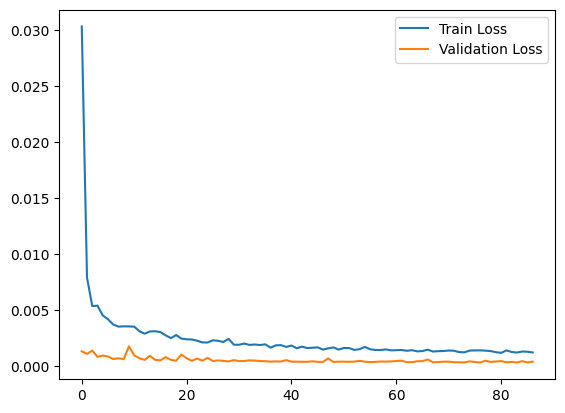

In [ ]:
# V·∫Ω bi·ªÉu ƒë·ªì loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

9/9 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 93ms/step


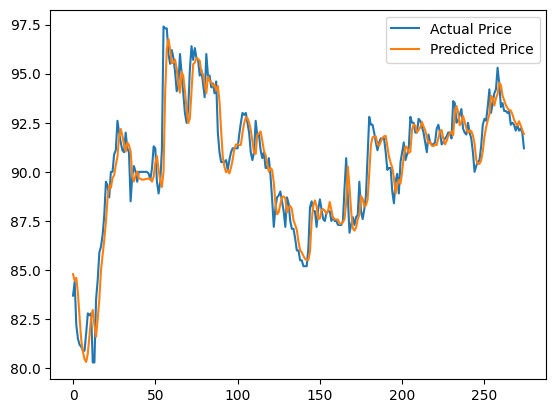

In [ ]:

y_pred = model.predict(X_test)

# Inverse transform ch·ªâ c·ªôt "close"
y_pred_rescaled = scaler_close.inverse_transform(y_pred.reshape(-1, 1))[:, 0]
y_test_rescaled = scaler_close.inverse_transform(y_test.reshape(-1, 1))[:, 0]

# V·∫Ω bi·ªÉu ƒë·ªì d·ª± ƒëo√°n
plt.plot(y_test_rescaled, label='Actual Price')
plt.plot(y_pred_rescaled, label='Predicted Price')
plt.legend()
plt.show()

In [ ]:
"""# D·ª± ƒëo√°n gi√° t∆∞∆°ng lai"""

def predict_next_days(model, last_data, scaler_close, days=10):
    predictions = []
    input_data = last_data.copy()

    for _ in range(days):
        pred = model.predict(input_data.reshape(1, time_steps, -1))[0, 0]
        predictions.append(pred)

        # D·ªãch input_data l√™n v√† thay th·∫ø gi√° d·ª± ƒëo√°n
        input_data = np.roll(input_data, -1, axis=0)
        input_data[-1, -1] = pred  # Ch·ªâ c·∫≠p nh·∫≠t c·ªôt close

    # Inverse transform ch·ªâ cho c·ªôt close
    predictions = np.array(predictions).reshape(-1, 1)
    predicted_prices = scaler_close.inverse_transform(predictions)[:, 0]

    return predicted_prices
# D·ª± ƒëo√°n 10 ng√†y t·ªõi
future_prices = predict_next_days(model, X_test[-1], scaler_close, days=10)
print(future_prices)

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 55ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 52ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 51ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 53ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 52ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 57ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 58ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 54ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 59ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 54ms/step
[91.92868  91.113976 90.704704 90.51539  90.512276 90.854836 91.46597
 91.75956  92.00257  92.25988 ]


In [ ]:
import numpy as np

# D·ª± ƒëo√°n gi√° t∆∞∆°ng lai
def predict_next_days(model, last_data, scaler_close, days=15):
    predictions = []
    input_data = last_data.copy()

    for _ in range(days):
        pred = model.predict(input_data.reshape(1, time_steps, -1))[0, 0]
        predictions.append(pred)

        # D·ªãch input_data l√™n v√† thay th·∫ø gi√° d·ª± ƒëo√°n
        input_data = np.roll(input_data, -1, axis=0)
        input_data[-1, -1] = pred  # Ch·ªâ c·∫≠p nh·∫≠t c·ªôt close

    # Inverse transform ch·ªâ cho c·ªôt close
    predictions = np.array(predictions).reshape(-1, 1)
    predicted_prices = scaler_close.inverse_transform(predictions)[:, 0]

    return predicted_prices

# D·ª± ƒëo√°n 10 ng√†y t·ªõi
future_prices = predict_next_days(model, X_test[-1], scaler_close, days=15)

# T·∫°o danh s√°ch ng√†y d·ª± ƒëo√°n (gi·∫£ s·ª≠ b·∫Øt ƒë·∫ßu t·ª´ ng√†y ti·∫øp theo)
import pandas as pd
from datetime import datetime, timedelta

start_date = datetime.strptime("2025-01-01", "%Y-%m-%d")  # Thay b·∫±ng ng√†y th·ª±c t·∫ø
future_dates = [start_date + timedelta(days=i) for i in range(len(future_prices))]

# In k·∫øt qu·∫£ theo chi·ªÅu d·ªçc
print("D·ª± ƒëo√°n gi√° VCB cho 15 ng√†y ti·∫øp theo:\n")
for i, (date, price) in enumerate(zip(future_dates, future_prices)):
    print(f"{i:<2} {date.strftime('%Y-%m-%d')}  {price:.6f}")


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 52ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 53ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 64ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 60ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 83ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 80ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 84ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 82ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 83ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 84ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 77ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 76ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
# T√≠nh MAPE
mape = mean_absolute_percentage_error(y_test_rescaled, y_pred_rescaled)
# T√≠nh MAE
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)

# T√≠nh MSE
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)

# T√≠nh RMSE (CƒÉn b·∫≠c hai c·ªßa MSE)
rmse = np.sqrt(mse)

# In k·∫øt qu·∫£ ƒë√°nh gi√°
print(f"üìä ƒê√°nh gi√° m√¥ h√¨nh BiLSTM:")
print(f"MAE  (Mean Absolute Error): {mae:.4f}")
print(f"MSE  (Mean Squared Error) : {mse:.4f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.4f}")
print(f"MAPE (Mean Absolute Percentage Error): {mape:.2f}%")


üìä ƒê√°nh gi√° m√¥ h√¨nh BiLSTM:
MAE  (Mean Absolute Error): 0.7371
MSE  (Mean Squared Error) : 1.1146
RMSE (Root Mean Squared Error): 1.0557
MAPE (Mean Absolute Percentage Error): 0.82%
